<a href="https://colab.research.google.com/github/HrishiGhodke/CODSOFT/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading The Data

In [79]:
import pandas as pd

In [80]:
df=pd.read_csv("/content/IMDb Movies India.csv",encoding="latin")

In [81]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [83]:
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

# Coping the Data to work on it

In [84]:
df1=df.copy()
print(df1)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

# Checking for null Vales

In [85]:
print(df1.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [86]:
print(df1.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


#Handling the Null Values

In [87]:
df1=df1.dropna(subset=['Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'])

In [88]:
df1=df1.dropna().reset_index(drop=True)

# Datatype to Numaric

In [89]:
df1["Duration"]=df1.loc[:,"Duration"].str.replace("min","")
df1["Duration"] = pd.to_numeric(df1.loc[:,"Duration"])

In [90]:
df1["Votes"]

,Votes
0,8
1,35
2,827
3,"1,086"
4,326
...,...
5654,408
5655,"1,496"
5656,44
5657,655


In [91]:
df1["Votes"]=df1.loc[:,"Votes"].str.replace(",","")
df1["Votes"]=pd.to_numeric(df1.loc[:,"Votes"])

In [92]:
df1.duplicated(subset=["Name","Year"]).sum()

2

#Removing the Duplicate Values

In [93]:
df1=df1.drop_duplicates(keep="first",subset=["Name","Year"]).reset_index(drop=True)

In [94]:
df1["Year"]

,Year
0,(2019)
1,(2019)
2,(1997)
3,(2005)
4,(2012)
...,...
5652,(2015)
5653,(2001)
5654,(1989)
5655,(1999)


In [95]:
df1["Year"]=df1["Year"].str.strip("()")
df1["Year"] = pd.to_numeric(df1.loc[:,"Year"])

In [96]:
# Display unique values for categorical columns
print(df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].nunique())


Genre        485
Director    5938
Actor 1     4718
Actor 2     4891
Actor 3     4820
dtype: int64


#Data Visualization

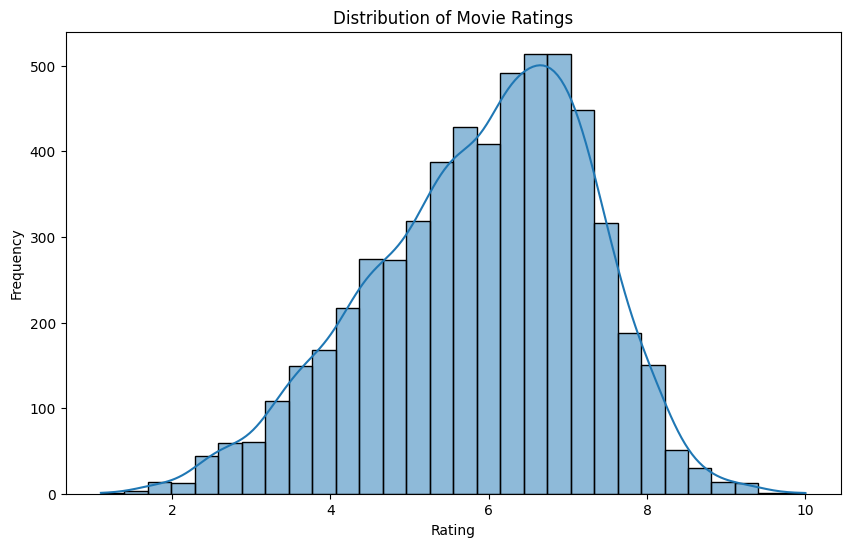

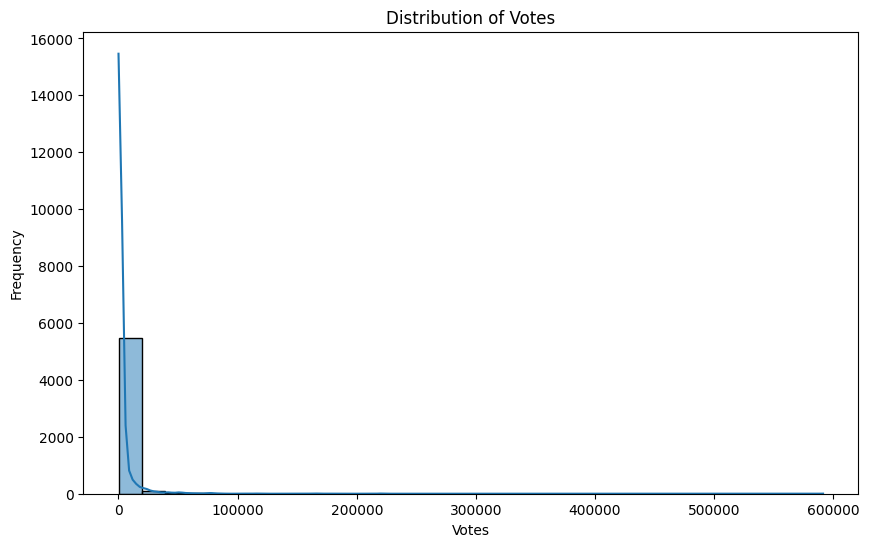

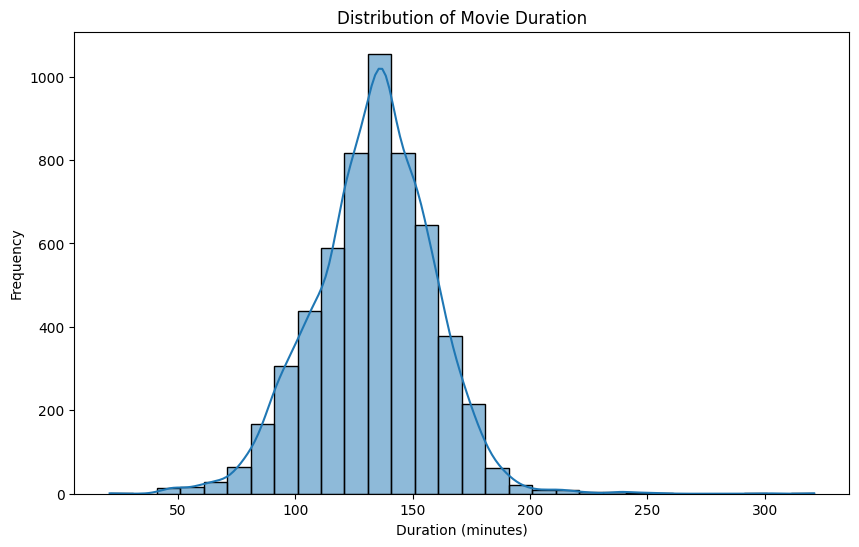

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df1['Rating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of Votes
plt.figure(figsize=(10, 6))
sns.histplot(df1['Votes'], bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

# Distribution of Duration
plt.figure(figsize=(10, 6))
sns.histplot(df1['Duration'], bins=30, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


Votes vs. Rating

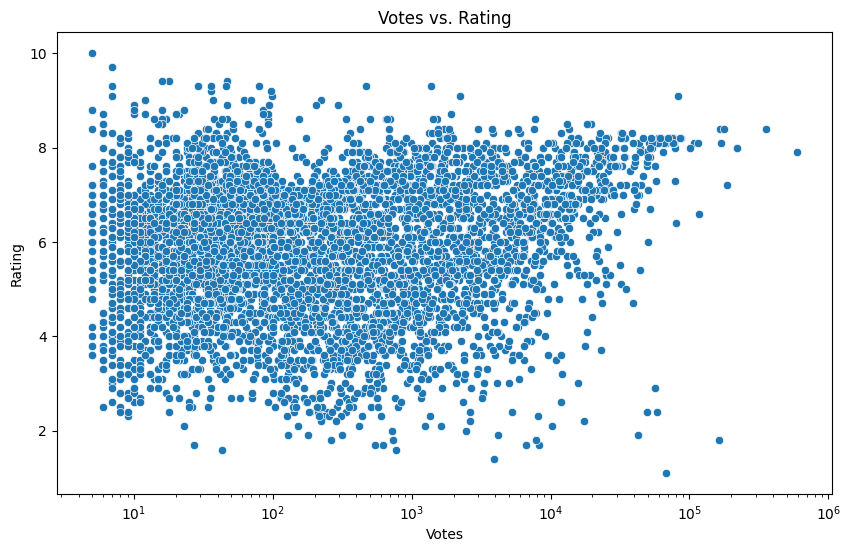

In [119]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df1)
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')  # Log scale for better visualization
plt.show()



Average rating and total votes by year

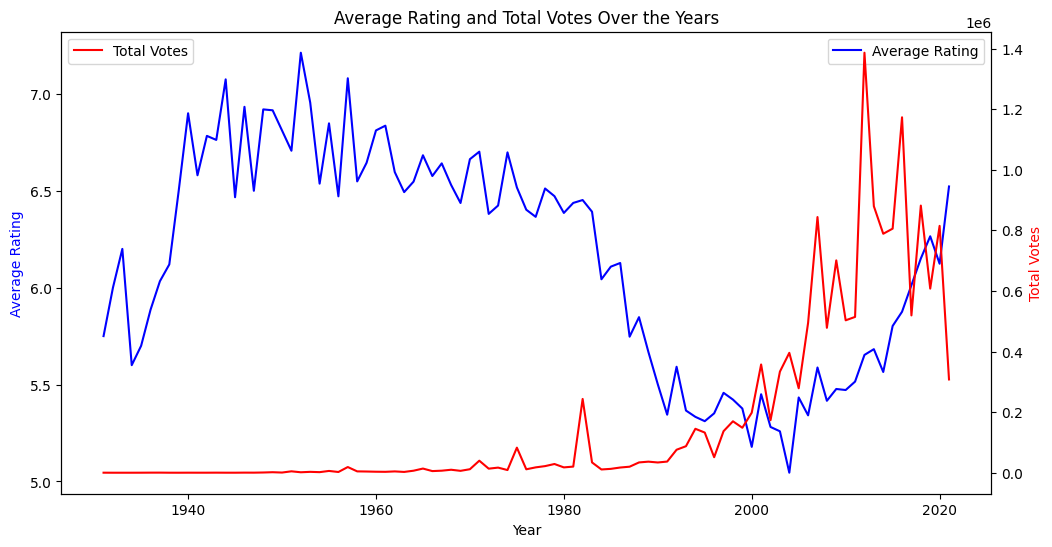

In [118]:
# Average rating and total votes by year using line plot
yearly_stats = df1.groupby('Year').agg({'Rating': 'mean', 'Votes': 'sum'}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Rating', data=yearly_stats, ax=ax1, color='b', label='Average Rating')
sns.lineplot(x='Year', y='Votes', data=yearly_stats, ax=ax2, color='r', label='Total Votes')

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating', color='b')
ax2.set_ylabel('Total Votes', color='r')
plt.title('Average Rating and Total Votes Over the Years')
plt.show()


Top 10 directors by number of movies

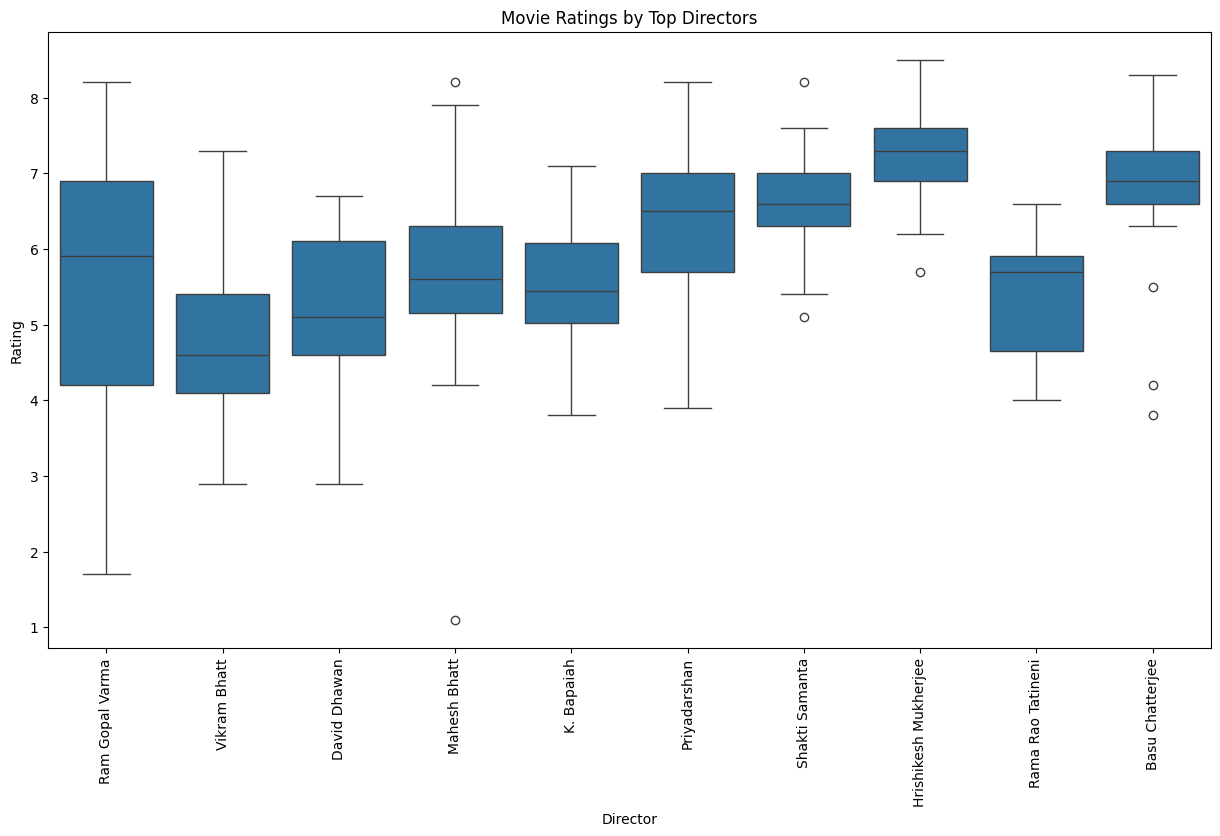

In [117]:
# Boxplot of Ratings by Director
top_directors = df1['Director'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
sns.boxplot(x='Director', y='Rating', data=df1[df1['Director'].isin(top_directors)])
plt.title('Movie Ratings by Top Directors')
plt.xticks(rotation=90)
plt.show()


Top 10 directors by average rating

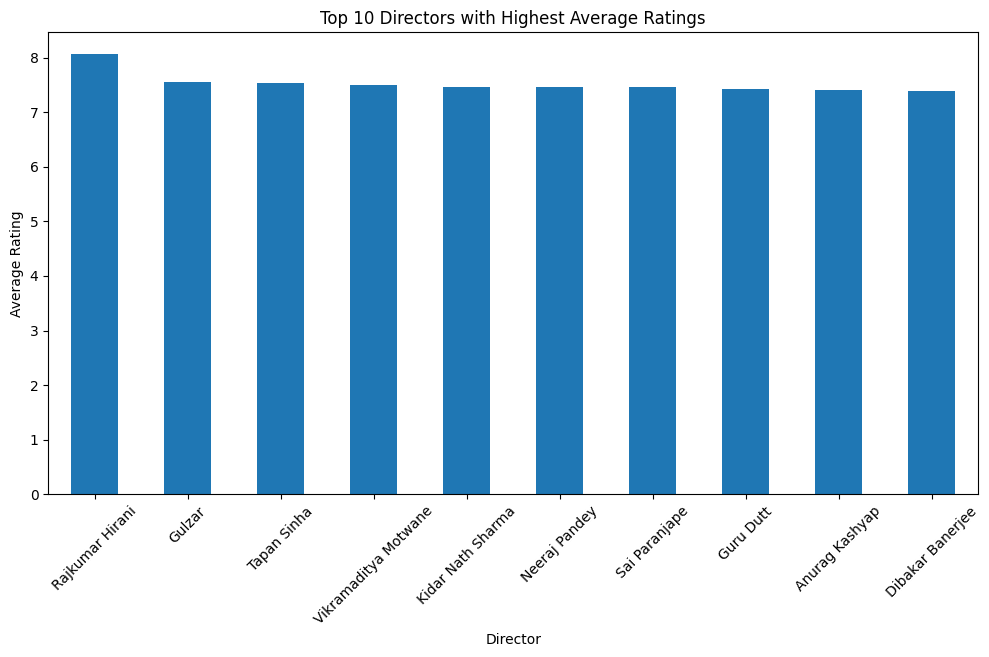

In [116]:

top_rated_directors = df1.groupby('Director').filter(lambda x: len(x) >= 5)
top_rated_directors = top_rated_directors.groupby('Director')['Rating'].mean().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
top_rated_directors.plot(kind='bar')
plt.title('Top 10 Directors with Highest Average Ratings')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


Top 10 Actors with Highest Average Ratings

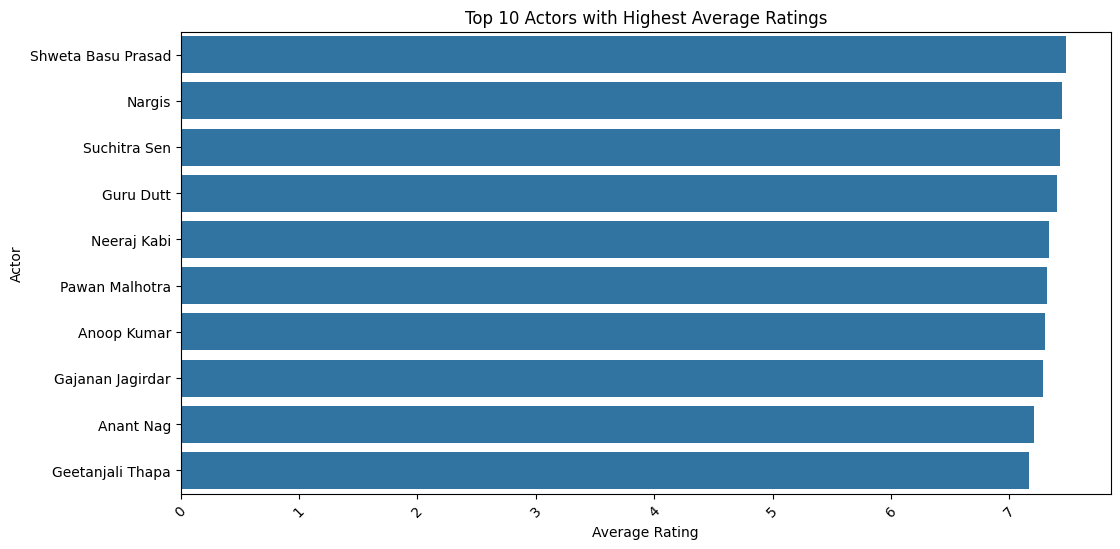

In [102]:
# Combine all actors into a single series
all_actors = pd.concat([df1['Actor 1'], df1['Actor 2'], df1['Actor 3']])

# Calculate average ratings per actor (min 5 appearances)
actor_ratings = df1.melt(id_vars=['Rating'], value_vars=['Actor 1', 'Actor 2', 'Actor 3'])
actor_ratings = actor_ratings.groupby('value')['Rating'].mean().reset_index(name='Avg Rating')
actor_ratings = actor_ratings[actor_ratings['value'].isin(all_actors.value_counts().loc[lambda x: x >= 5].index)]

# Top 10 actors
top_actors = actor_ratings.nlargest(10, 'Avg Rating')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg Rating', y='value', data=top_actors)
plt.title('Top 10 Actors with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Actor')
plt.xticks(rotation=45)
plt.show()


 Duration vs. Rating

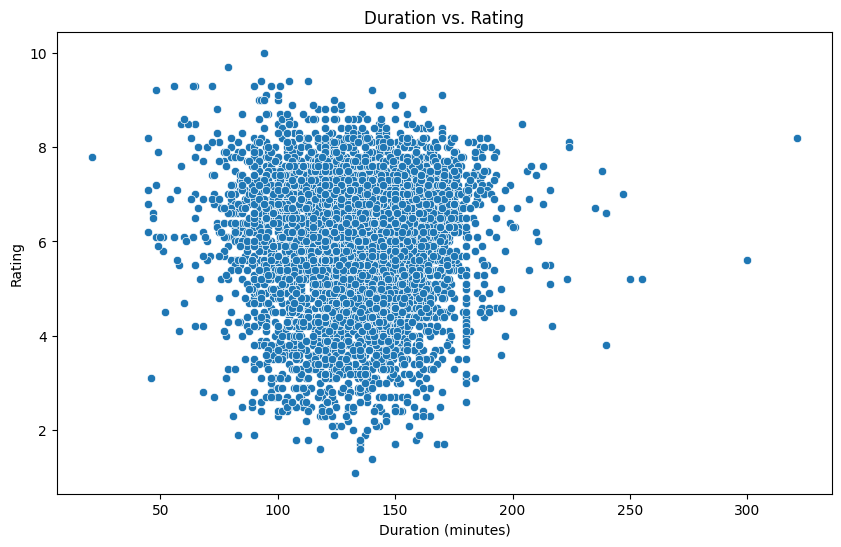

In [120]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df1)
plt.title('Duration vs. Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()


In [104]:
# Top 10 movies by rating
top_movies = df1.nlargest(10, 'Rating')[['Name', 'Rating', 'Year']]

# Display top movies
print(top_movies)


                     Name  Rating  Year
3145      Love Qubool Hai    10.0  2020
2027           Half Songs     9.7  2021
1897         Gho Gho Rani     9.4  2019
2573                 June     9.4  2021
5163  The Reluctant Crime     9.4  2020
536          Ashok Vatika     9.3  2018
692              Baikunth     9.3  2021
1919          God of gods     9.3  2019
3148         Love Sorries     9.3  2021
4320              Refl3ct     9.3  2021


In [107]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = df1.drop(columns=['Rating', 'Name'])
target = df1['Rating']

# One-hot encoding for categorical features
features = pd.get_dummies(features, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Linear Regression MOdel


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = linear_reg_model.predict(X_test)

# Calculate Mean Squared Error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")


Linear Regression - Mean Squared Error: 64042737143530.67


Random Forest Regressor Model

In [110]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")


Random Forest - Mean Squared Error: 1.2659916793286219


Gradient Boosting Regressor Model

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Calculate Mean Squared Error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")


Gradient Boosting - Mean Squared Error: 1.3481725334780617


Comparing the models

In [112]:
# Compare the MSE values
model_performance = {
    'Linear Regression': mse_lr,
    'Random Forest': mse_rf,
    'Gradient Boosting': mse_gb
}

# Find the best model
best_Model = min(model_performance, key=model_performance.get)
print(f"\nBest Model: {best_Model} with MSE: {model_performance[best_Model]}")



Best Model: Random Forest with MSE: 1.2659916793286219


#Results

In [113]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print(f"\nEvaluation of {best_Model}:")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")



Evaluation of Random Forest:
Mean Absolute Error: 0.8267022968197879
R-squared: 0.3447156513718943
